<h1>
    Deutschland
</h1>

# Daten

Im Folgenden wird statt mit Kalender-Daten, mit Tagen seit dem 24.2.2020, dem Beginn der täglichen Datenemeldungen des Robert-Koch-Instituts gerechnet. Die folgende Tabelle ermöglicht eine Umrechnung.

<table>
    <thead>
        <th>
           Tag Nr.
        </th>
        <th>
            Datum
        </th>
    </thead>
    <tbody>
        <tr>
            <td>0</td><td>24.2.2020</td>
        </tr>
        <tr>
            <td>10</td><td>5.3.2020</td>
        </tr>
        <tr>
            <td>20</td><td>15.3.2020</td>
        </tr>
        <tr>
            <td>30</td><td>25.3.2020</td>
        </tr>
        <tr>
            <td>40</td><td>4.4.2020</td>
        </tr>
        <tr>
            <td>50</td><td>14.4.2020</td>
        </tr>
        <tr>
            <td>60</td><td>24.4.2020</td>
        </tr>
    </tbody>
</table>

# Zahl der Infektionen (täglich)

Kumulierte Zahl der Infektionen in Deutschland nach Angaben des Robert-Koch-Instituts vom 24.2.2020 (Tag 0) bis zum 30.3.2020. Die rote Kurve stellt eine Exponentialfunktion dar, die den Verlauf der Infektionszahlen approximiert.

311.0197093042058*e^(0.15141609268594539*x)

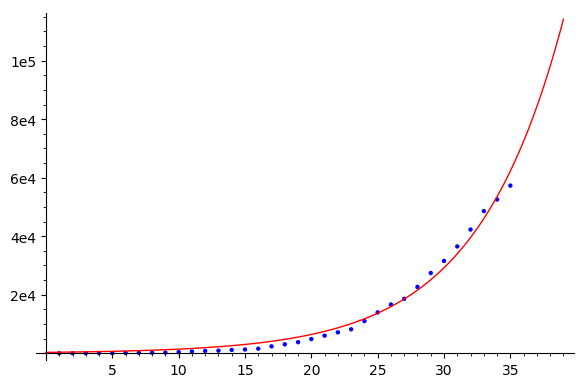

In [2]:
var('n,x,y,a,b')
infections_de=[16,18,21,26,53,66,117,150,188,240,400,639,795,902,1139,1296,1567,2369,3062,3795,4838,6012,7156,8198,10999,13957,16662,18610,22672,27436,31554,36508,42288,48582,52547,57298]
dataNr_de=len(infections_de)
maxDays=dataNr_de+3
deads_de=[12,20,31,46,55,86,114,149,198,253,325,389,455]
deadsNr_de=len(deads_de)
from IPython.display import Markdown as md
f_exp(x)=a*e^(b*x)
infections_de_points=[(n,infections_de[n]) for n in range(1,dataNr_de)]
q=find_fit(infections_de_points, f_exp, solution_dict = True)
show(f_exp(a=q[a],b=q[b]))
list_plot(infections_de_points)+plot(f_exp(a=q[a],b=q[b]), 0, maxDays, color='red')

Sehen wir uns die Logarithmen dieser Werte an. Dazu zeichnen wir eine passende Regressionsgerade und einen Korridor um diese Gerade.

0.2396102488135452*x + 3.322279817571749

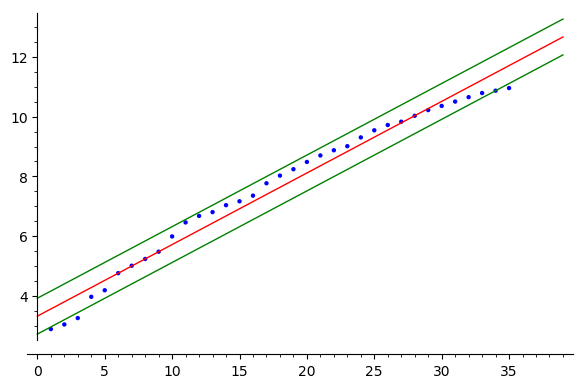

In [3]:
f_lin(x)=b*x+a
infections_ln_de_points=[(n,ln(infections_de[n])) for n in range(1,dataNr_de)]
q=find_fit(infections_ln_de_points, f_lin, solution_dict = True)
show(f_lin(a=q[a],b=q[b]))
delta=0.6
list_plot(infections_ln_de_points)+plot(f_lin(a=q[a],b=q[b]), 0, maxDays, color='red')+plot(f_lin(a=q[a],b=q[b])+delta, 0, maxDays, color='green')+plot(f_lin(a=q[a],b=q[b])-delta, 0, maxDays, color='green')

Relativer Anstieg zum Vortag:

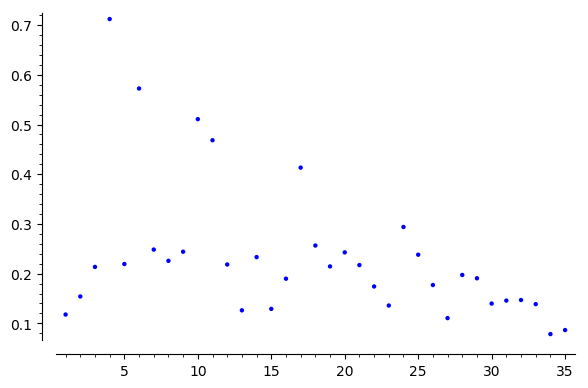

In [4]:
k_n_de = [(n,ln(infections_de[n]/infections_de[n-1])) for n in range(1,dataNr_de)]
list_plot(k_n_de)

# Zahl der Infektionen (gemittelt)

Der tägliche Zuwachs an Infektionsfällen in Deutschland schwankt sehr stark. Um dennoch eine Tendenz zu erkennen wird im folgenden Diagramm für jedes $n$ $k_1(n)=\frac{\ln(i(n+w))-\ln(i(n-w))}{2w}$ berechnet, wobei $i(n)$ die Zahl der Infektionen am Tag $n$ und $w$ die halbe Größe eines Zeitfensters um Tag $n$ ist. Dies ist der durchschnittliche Exponent eines angenommenen exponentiellen Wachstums gemittelt aus den Daten von $w+1$ Tagen. Je größer $w$ ist, desto klarer ist eine Tendenz zu erkennen.

Wir verwenden im Folgenden $w=3$, also die Daten einer Woche, um den gleitenden Durchschnitt zu berechnen. Dies ist der größte Wert, bei dem im Bereich immer genau ein Wochenende liegt. Dies ist von Interesse, da das Rober-Koch-Institut am Wochenende Daten nur unvollständig erhält. Für $w=3$ sind die Werte im folgenden Diagramm dargestellt, zusammen mit dem Ergebnis einer linearen Regression in rot.

Die Regressionsgrade trifft die $y-$Achse bei etwa Tag $47\pm 3$; falls das Modell zutrifft, würde die Zahl der Neuinfektionen zwischen dem 8.4. und 15.4. auf 0 sinken.

-0.007900701404799593*x + 0.38275098297206744

\text{\texttt{Schnittpunkt{ }mit{ }der{ }x{-}Achse{ }bei:{ }}} 48.445190289

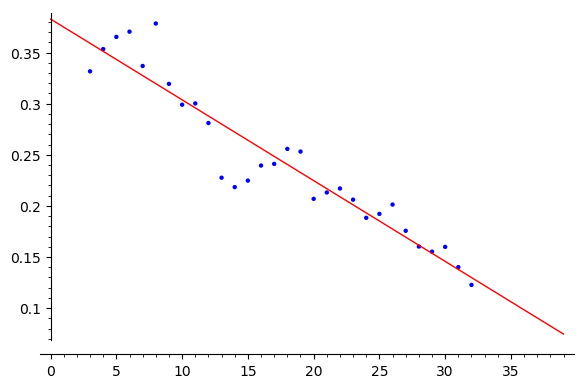

In [5]:
w=3
def k1(n): return (ln(infections_de[n+w])-ln(infections_de[n-w]))/(2*w)
k1_n_de = [(n,k1(n)) for n in range(w,dataNr_de-w)]
var('a,b')
f0(x)=a*x+b
q=find_fit(k1_n_de,f0,solution_dict=True)
show(f0(a=q[a],b=q[b]))
a0=q[a]
b0=q[b]
show(latex("Schnittpunkt mit der x-Achse bei: ")+(-b0/a0))
list_plot(k1_n_de)+plot(f0(a=q[a],b=q[b]),0,maxDays,color='red')

Die Regressionsgerade schneidet die Abszisse am berechneten Tag.

# Reproduktionsrate

Nach Einschätzung der Deutschen Gesellschaft für Epidemiologie liegt die Basisreproduktionsrate, d.h. die Zahl der von einem Infizierten ohne Schutzmassnaangesteckten Personen, ohne einschränkende Maßnahmen bei 2-3. Damit die Intensivpflege in den deutschen Krankenhäusern (ohne zusätzliche Ressourcen) nicht überlastet wird, müsste sie auf 1.1-1,2 gesenkt werden.

Wir suchen eine Formel zur Berchnung der aktuellen Reproduktionsrate. Dazu nehmen wir an, dass die Basisreproduktionsrate (ohne einschränkende Maßnahmen) bei $r_0 = 3$ liegt, dem Wert, den die [Studie 12 des Imperial College" vom 26.3.2019](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf) annimmt, mit einer Variation zwischen 2.4 und 3.3. Die Zeit, in der ein Patient andere Personen anstecken kann, wird mit 14 Tagen angesetzt. Wie nehmen an, dass die maximale Reproduktionsrate, die mangels Schutzmaßnahmen gleich der Basisreproduktionsrate ist, in den 2 Wochen aktiv ist, in denen der Anstieg der Infektionen am höchsten ist.

Nehmen wir ferner an, dass die Ausbreitung des Virus in dieser Zeit durch eine Exponentialfunktion $a e^{kx}$ beschrieben wird, so ist der relative Anstieg in dieser Periode, die mit dem Tag $x_0$ beginnt, $\frac{e^{k(x+14)}}{e^{k x}}=e^{14 k}$. 

Wenn wir nun die 2 Wochen mit maximalem relativem Anstieg der Infektionen finden, so können wir den zugehörigen Koeffizienten $k_{max}$ bestimmen, der der maximalen Basisreproduktionsrate von 2.4 entspricht.

## Deutschland

In [6]:
r_0=3
r0_min=2.4
r0_max=3.3
k_max_de=max([ln((infections_de[n+14])/infections_de[n])/14 for n in range(0,dataNr_de-14)])
k_max_de.n()

0.322294761866950

## China

In [7]:
infections_ch=[278,309,573,834,1294,1982,2757,4530,5989,7728,9711,11811,14401,17228,20461,24352,28049,31195,34582,37234,40217,42690,44712,46532,48530,50036,51174]
dataNr_ch=len(infections_ch)
k_max_ch=max([ln((infections_ch[n+14])/infections_ch[n])/14 for n in range(0,dataNr_ch-14)])
k_max_ch.n()

0.311930570268833

## Italien

In [8]:
infections_it=[39,79,159,236,326,471,650,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,17660,21157,24747]
dataNr_it=len(infections_it)
k_max_it=max([ln((infections_it[n+14])/infections_it[n])/14 for n in range(0,dataNr_it-14)])
k_max_it.n()

0.341288968452143

## Diskussion

Die maximale Infektionsausbreitung findet in der Anfangsphase der Pandemie statt. In dieser Phase werden Fälle oft unvollständig erfasst, woraus sich eine Unsicherheit der Berechnung ergibt. Der Wert für Deutschland liegt zwischen dem Wert für China und Italien, die sich ihrerseits um etwa 9% unterscheiden.
Wir arbeiten im folgenden weiter mit dem Wert $k_{max}$ für Deutschland.

In [9]:
k_max=k_max_de

<b>Annahme:</b>Wir nehmen im Folgenden einen linearen Zusammenhang zwischen der aktuellen Reproduktionsrate $r$ und dem aktuellen Koeffizienten $k$ der die Zahl der Infektionen beschreibenden Exponentialfunktion an. Dies ist hier nur für den Bereich von Interesse, für den das Modell exponentiellen Wachstums anwendbar ist, also für einen Reproduktionsgrad $r > 1$ und einen Exponentialkoeffizienten $k > 0$. Sei etwa $r=c\cdot k + d$. Dann müssen wir $d=1$ setzen, damit $k$ und $r$ gleichzeitig den Bereich der Anwendbarkeit des exponentiellen Modells verlassen, $r=c\cdot k+1$.

$k(n)$ haben wir bereits oben in $k_1$ ermittelt, jeweils gemittelt über eine Woche. Damit ergibt sich für den Koeffiziemtem $c=\frac{r_0-1}{k_{max}}$ und für Reproduktionsgrad $r$, ebenfalls gemittelt über eine Woche $r(n)=c \cdot k_1(n) + 1 = \frac{r_0-1}{k_{max}}\cdot k_1(n)+1$:

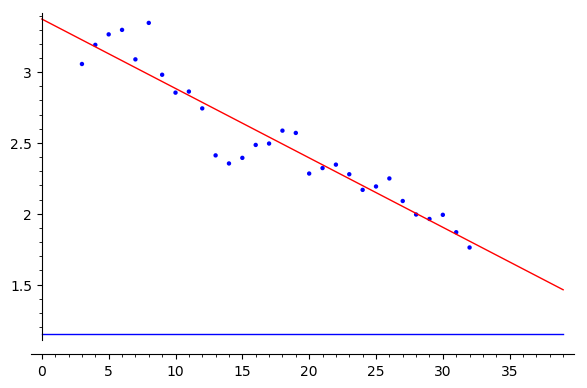

In [10]:
def rr1(rr,n): return ((rr-1)/k_max)*k1(n)+1
def r1(n): return rr1(r_0,n)
r1_n_de = [(n,r1(n)) for n in range(w,dataNr_de-w)]
f10(x)=a*x+b
q10=find_fit(r1_n_de,f10,solution_dict=True)
a10=q10[a]
b10=q10[b]
r_z=1.15
list_plot(r1_n_de)+plot(f10(a=a10,b=b10),0,maxDays,color='red')+plot(r_z,0,maxDays,color='blue')

Die blaue Linie in diesem Diagramm bezeichnet einen zunächst anzustrebenden Reproduktionsgrad von $r_z=1.15$. Wir berechnen, an welchem Tag dieser nach diesem Modell erreicht würde.

In [11]:
r_z_x=solve(a10*x+b10==r_z,x)
print "Reproduktionsgrad von ",r_z," erreicht an Tag ",r_z_x[0].rhs().n()

Reproduktionsgrad von  1.15000000000000  erreicht an Tag  45.3857015403011


Sehen wir uns den letzten (aktuellen) Wert $r_{last}$ für die Reproduktionsrate an. Wenn der letzte Wert von $k_1$ über (unter) der Regressionsgeraden liegt, so wird der Wert von $r_{last}$ über (unter) dem Wert liegen, der im obigen Diagramm durch die rote Gerade für die Funktion $r$ angezeigt wird.

In [12]:
r_last=(r1(dataNr_de-w-1)).n()
show(LatexExpr("r_{last}="), r_last)

r_{last}= 1.76163167653808

In [13]:
md(u"Je nachdem wo die Basisreproduktionsrate $r_0$ zwischen %f und %f lag ergibt sich für die Schätzung der aktuellen Rate ein kleinerer $(r_{opt})$ bzw. größerer ($r_{pess}$) Wert:"%(r0_min,r0_max))

Je nachdem wo die Basisreproduktionsrate $r_0$ zwischen 2.400000 und 3.300000 lag ergibt sich für die Schätzung der aktuellen Rate ein kleinerer $(r_{opt})$ bzw. größerer ($r_{pess}$) Wert:

In [14]:
r_opt=(rr1(r0_min,dataNr_de-w-1)).n()
r_pess=(rr1(r0_max,dataNr_de-w-1)).n()
show(LatexExpr("r_{opt}="), r_opt)
show(LatexExpr("r_{pess}="), r_pess)

r_{opt}= 1.53314217357666

r_{pess}= 1.87587642801879

# Verdopplungsrate (gemittelt)

Am 28.3.2020 [erklärte Kanzleramtschef Braun](https://www.tagesspiegel.de/politik/kanzleramtschef-erteilt-rascher-lockerung-eine-absage-bis-20-april-bleiben-alle-coronavirus-massnahmen-bestehen/25690036.html): 

> Wenn wir es schaffen, die Infektionsgeschwindigkeit so zu verlangsamen, dass wir zehn, zwölf oder noch mehr Tage haben bis zu einer Verdopplung, dann wissen wir, dass wir auf dem richtigen Weg sind.

In [15]:
lastDay=dataNr_de-w
#lastDays=lastDay
lastDays=7
md(u"Dazu ermitteln wir für jeden Tag n die Verdopplungsrate für den Zeitraum $n \pm %i$ Tage. Wir analysieren dazu die mittlere Verdoppelungsrate der letzten %i Tage."%(w,lastDays))

Dazu ermitteln wir für jeden Tag n die Verdopplungsrate für den Zeitraum $n \pm 3$ Tage. Wir analysieren dazu die mittlere Verdoppelungsrate der letzten 7 Tage.

0.308064127202909*x - 4.489725553726565

\text{\texttt{Ziel:{ }Verdopplung{ }in{ }hoechstens{ }}} 11 \text{\texttt{{ }Tagen}}

\text{\texttt{Erreicht{ }Ziel{ }bei{ }}} 50.2808479987 \text{\texttt{{ }Tagen}}

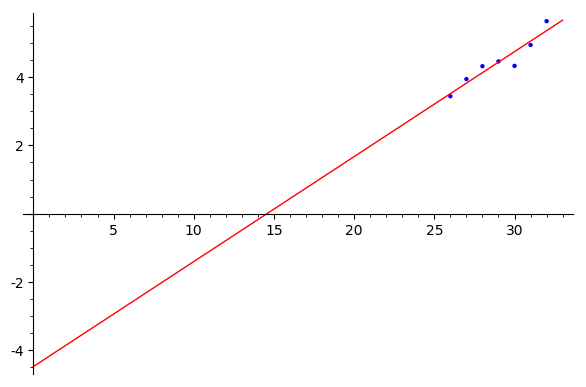

In [16]:
d_de=[(n,ln(2)/k1(n)) for n in range(max(w,lastDay-lastDays),lastDay)]
f1(x)=a*x+b
q=find_fit(d_de,f1,solution_dict=True)
c=11
t=4
show(f1(a=q[a],b=q[b]))
show(latex("Ziel: Verdopplung in hoechstens ")+c+latex(" Tagen"))
show(latex("Erreicht Ziel bei ")+(c-q[b])/q[a]+latex(" Tagen"))
list_plot(d_de)+plot(f1(a=q[a],b=q[b]),0,33,color='red')

In [17]:
c=11
md(u"Wie niedrig muss die aktuelle Reproduktionsrate sein, damit die Zeit für die Verdopplung der Infektionen über  c=%i Tagee steigt?"%(c))

Wie niedrig muss die aktuelle Reproduktionsrate sein, damit die Zeit für die Verdopplung der Infektionen über  c=11 Tagee steigt?

Die Zeit $t_2$, in der sich die Werte einer Funktion $e^{kx}$ verdoppeln, ist $t_2=\frac{\ln(2)}{k}$. Damit $t_2 \geq c$ ist, muss also $k \leq \frac{\ln(2)}{c}$ sein. Den Zusammenhang des Exponenten $k$ mit der Reproduktionsrate $r$ hatten wir durch $r=\frac{r_0}{k_{max}}\cdot k$ modelliert. Damit $t_2 \geq c$ ist, muss also auch $r \leq \frac{r_0}{k_{max}}\cdot \frac{ln(2)}{c}$ sein.

In [18]:
zr=((r_0/k_max)*(ln(2)/c)).n()
zr
(ln(2)/c).n()

0.0630133800509041

# Zahl der Todesfälle

Die Zahl der gemeldeten Infektionen hängt direkt davon ab, wie viele Personen auf das Virus getestet werden. Bei einem Ausbau der Testmöglichkeiten könnten so auch die Infektionszahlen einen zusätzlichen Anstieg aufweisen, was die mittelfristige Vergleichbarkeit der Daten beschränken würde.

Wenn wir davon ausgehen, dass - im Unterschied zu den Infektione - alle Corona-bedingten Todesfälle auch bisher bereits durch Tests bestätigt wurden, so bietet die kumulierte Zahl der Todesfälle auf mttlere Sicht besser vergleichbare Werte, wobei deren zufällige Schwankung durch die geringe Zahl der Fälle größer anzunehmen ist.

Das Robert-Koch-Institut veröffentlicht die Zahl der Corona-Todefälle ab dem 18.3.2020 (Tag 23) jeweils um 0:00. Wir nehmen für die Zeit von der Erfassung der Infektion bis zum Tod des Patienten einen Zeitraum von 10 Tagen an und verschieben die Werte zeitlich entsprechend.

1.2995448012298538*e^(0.23658763201306524*x)

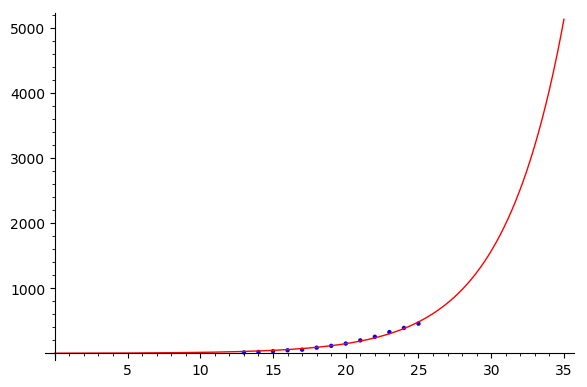

In [19]:
delay=10
deads_de_points=[(n+23-delay,deads_de[n]) for n in range(0,deadsNr_de)]
q=find_fit(deads_de_points, f_exp, solution_dict = True)
show(f_exp(a=q[a],b=q[b]))
list_plot(deads_de_points)+plot(f_exp(a=q[a],b=q[b]), 0, 35, color='red')

Sehen wir uns die Logarithmen dieser Werte an. Dazu zeichnen wir eine passende Regressionsgerade und einen Korridor um diese Gerade.

In [20]:
start_common=23-delay
end_common=start_common+deadsNr_de-1
md(u"Wir betrachten das Verhältnis der kumulierten Todesfälle (nach links verschoben um %i Tage) zu den kumulierten Infektionen von Tag %i bis Tag %i."%(delay, start_common,end_common))

Wir betrachten das Verhältnis der kumulierten Todesfälle (nach links verschoben um 10 Tage) zu den kumulierten Infektionen von Tag 13 bis Tag 25.

0.2982233123831376*x - 1.0789774565083574

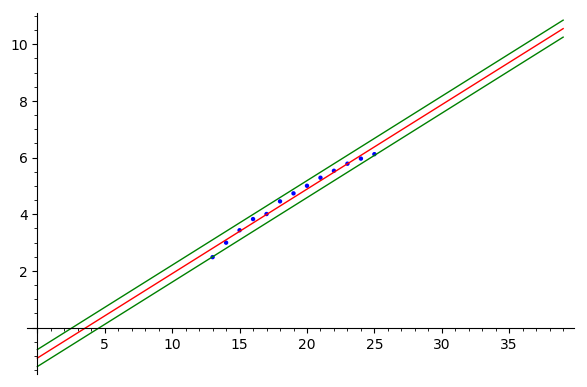

In [27]:
f_lin30(x)=b*x+a
deads_ln_de_points=[(n+23-delay,ln(deads_de[n])) for n in range(0,deadsNr_de)]
q30=find_fit(deads_ln_de_points, f_lin30, solution_dict = True)
a30=q30[a]
b30=q30[b]
show(f_lin30(a=a30,b=b30))
delta=0.3
list_plot(deads_ln_de_points)+plot(f_lin30(a=a30,b=b30), 0, maxDays, color='red')+plot(f_lin(a=a30,b=b30)+delta, 0, maxDays, color='green')+plot(f_lin(a=a30,b=b30)-delta, 0, maxDays, color='green')

In [22]:
md(u"Die folgende Graphik zeigt für den Tag $n$ das Verhältnis der bis zum Tag $n+%i$ Verstorbenen zu den bis zum Tag $n$ als infiziert Erkannten."%(delay))

Die folgende Graphik zeigt für den Tag $n$ das Verhältnis der bis zum Tag $n+10$ Verstorbenen zu den bis zum Tag $n$ als infiziert Erkannten.

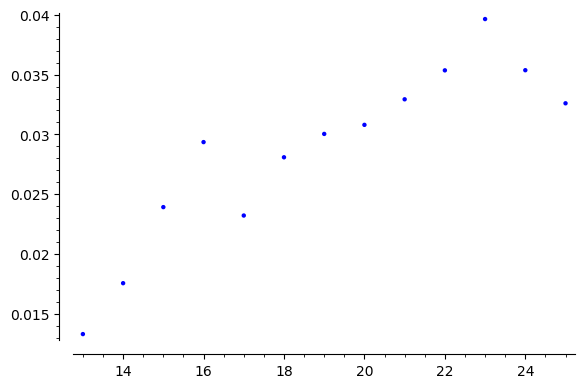

In [23]:
deads_per_infect_de=[(n,deads_de[n-23+delay]/infections_de[n]) for n in range(23-delay,23+deadsNr_de-delay) ]
list_plot(deads_per_infect_de)